### Single Algorithm in single library

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), '../../sdk'))

In [2]:
from opendp.whitenoise.evaluation.params._privacy_params import PrivacyParams
from opendp.whitenoise.evaluation.params._eval_params import EvaluatorParams
from opendp.whitenoise.evaluation.params._benchmark_params import BenchmarkParams
from opendp.whitenoise.evaluation.report._report import Report
from opendp.whitenoise.evaluation.privacyalgorithm._base import PrivacyAlgorithm
from opendp.whitenoise.evaluation.evaluator._dp_evaluator import DPEvaluator
from opendp.whitenoise.evaluation.benchmarking._dp_benchmark import DPBenchmarking
from opendp.whitenoise.evaluation.metrics._metrics import Metrics
import random
import pytest
from statistics import mean
import matplotlib.pyplot as plt

In [3]:
import opendp.whitenoise.core as wn
from dp_core import DPCore
pa = DPCore()
epsilon_list = [0.5, 1.0, 2.0, 4.0]
pp = PrivacyParams(epsilon=1.0)
ev = EvaluatorParams(repeat_count=100)
# Creating neighboring datasets
d1 = list(range(1, 501))
d2 = list(range(1, 501))
drop_elem = random.choice(d2)
d2.remove(drop_elem)
benchmarking = DPBenchmarking()
# Preparing benchmarking params
pa_algorithms = {pa : [[wn.dp_mean, mean]]}
privacy_params_list = []
for epsilon in epsilon_list:
    pp = PrivacyParams()
    pp.epsilon = epsilon
    privacy_params_list.append(pp)
d1_d2_list = [[d1, d2]]
benchmark_params = BenchmarkParams(pa_algorithms, privacy_params_list, d1_d2_list, ev)
benchmark_metrics_list = benchmarking.benchmark(benchmark_params)

#### Logging metrics

In [4]:
msd, mse, wsd, js, std, kl, dp_res = [], [], [], [], [], [], []
dataset_size = 0
for bm in benchmark_metrics_list:
    dataset_size = bm.dataset_params.dataset_size
    for key, metrics in bm.key_metrics.items():
        msd.append(metrics.msd)
        mse.append(metrics.mse)
        wsd.append(metrics.wasserstein_distance)
        js.append(metrics.jensen_shannon_divergence)
        std.append(metrics.std)
        kl.append(metrics.kl_divergence)
        dp_res.append(metrics.dp_res)

#### Dataset Size

In [5]:
print("Dataset size: " + str(dataset_size)) #list(range(1:501))
print("Dropped Index: " + str(drop_elem))

Dataset size: 500
Dropped Index: 475


#### DP Mean - MSE by Epsilon

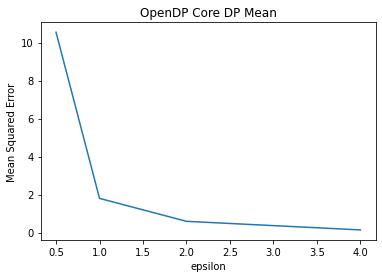

In [6]:
plt.plot(epsilon_list, mse) 
plt.xlabel('epsilon') 
plt.ylabel('Mean Squared Error') 
plt.title('OpenDP Core DP Mean') 
plt.show() 

#### DP Mean - Mean Signed Deviation by epsilon

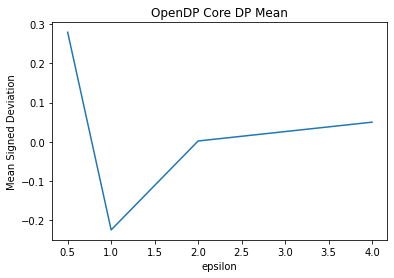

In [7]:
plt.plot(epsilon_list, msd) 
plt.xlabel('epsilon') 
plt.ylabel('Mean Signed Deviation') 
plt.title('OpenDP Core DP Mean') 
plt.show() 

#### DP Mean - Standard Deviation by Epsilon

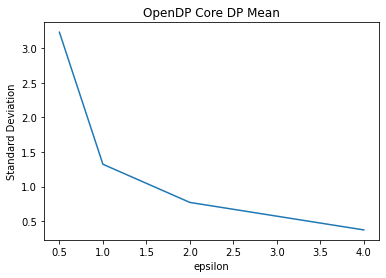

In [8]:
plt.plot(epsilon_list, std) 
plt.xlabel('epsilon') 
plt.ylabel('Standard Deviation') 
plt.title('OpenDP Core DP Mean') 
plt.show() 

#### DP Mean - JS Divergence by Epsilon

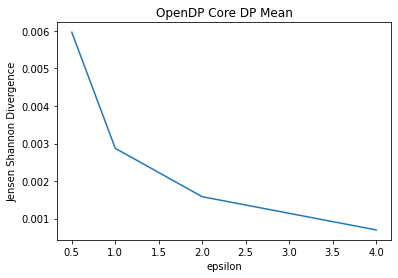

In [9]:
plt.plot(epsilon_list, js) 
plt.xlabel('epsilon') 
plt.ylabel('Jensen Shannon Divergence') 
plt.title('OpenDP Core DP Mean') 
plt.show() 

#### KL Divergence

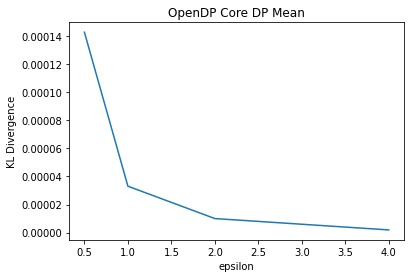

In [10]:
plt.plot(epsilon_list, kl) 
plt.xlabel('epsilon') 
plt.ylabel('KL Divergence') 
plt.title('OpenDP Core DP Mean') 
plt.show() 

#### Wasserstein Distance

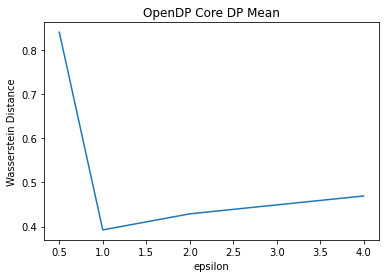

In [11]:
plt.plot(epsilon_list, wsd) 
plt.xlabel('epsilon') 
plt.ylabel('Wasserstein Distance') 
plt.title('OpenDP Core DP Mean') 
plt.show() 

### Multiple aggregation benchmarking in same library

In [12]:
pa_algorithms = {pa : [[wn.dp_mean, mean],
                      [wn.dp_sum, sum]]}
benchmark_params = BenchmarkParams(pa_algorithms, privacy_params_list, d1_d2_list, ev)
benchmark_metrics_list = benchmarking.benchmark(benchmark_params)

In [13]:
msd, mse, wsd, js, std, kl, dp_res, bias_res = {}, {}, {}, {}, {}, {}, {}, {}
dataset_size = 0
for bm in benchmark_metrics_list:
    dataset_size = bm.dataset_params.dataset_size
    for key, metrics in bm.key_metrics.items():
        msd.setdefault(bm.algorithm, []).append(metrics.msd)
        mse.setdefault(bm.algorithm, []).append(metrics.mse)
        wsd.setdefault(bm.algorithm, []).append(metrics.wasserstein_distance)
        js.setdefault(bm.algorithm, []).append(metrics.jensen_shannon_divergence)
        std.setdefault(bm.algorithm, []).append(metrics.std)
        kl.setdefault(bm.algorithm, []).append(metrics.kl_divergence)
        dp_res.setdefault(bm.algorithm, []).append(metrics.dp_res)
        bias_res.setdefault(bm.algorithm, []).append(metrics.bias_res)

#### Privacy Promise and Bias Promise Tests

In [14]:
print("Privacy Promise Test for DP Mean for multiple epsilon: " + str(dp_res[wn.dp_mean]))
print("Privacy Promise Test for DP Sum for multiple epsilon: " + str(dp_res[wn.dp_sum]))
print("Bias Promise Test for DP Mean for multiple epsilon: " + str(bias_res[wn.dp_mean]))
print("Bias Promise Test for DP Mean for multiple epsilon: " + str(bias_res[wn.dp_sum]))

Privacy Promise Test for DP Mean for multiple epsilon: [True, True, True, True]
Privacy Promise Test for DP Sum for multiple epsilon: [True, True, True, True]
Bias Promise Test for DP Mean for multiple epsilon: [True, True, True, True]
Bias Promise Test for DP Mean for multiple epsilon: [True, True, True, True]


#### JS Divergence by epsilon for MEAN, SUM

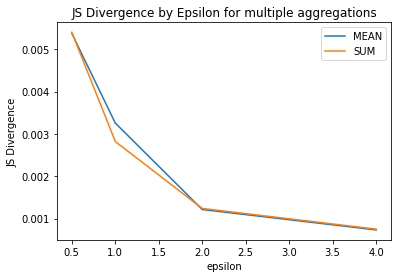

In [15]:
x1 = epsilon_list
y1 = js[wn.dp_mean]
y2 = js[wn.dp_sum]
plt.plot(x1, y1, label = "MEAN")
plt.plot(x1, y2, label = "SUM")
plt.xlabel('epsilon')
plt.ylabel('JS Divergence')
plt.title('JS Divergence by Epsilon for multiple aggregations')
plt.legend()
plt.show()

#### KL Divergence by epsilon for MEAN, SUM

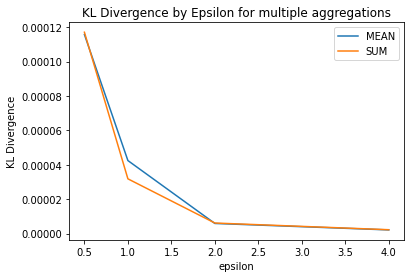

In [16]:
x1 = epsilon_list
y1 = kl[wn.dp_mean]
y2 = kl[wn.dp_sum]
plt.plot(x1, y1, label = "MEAN")
plt.plot(x1, y2, label = "SUM")
plt.xlabel('epsilon')
plt.ylabel('KL Divergence')
plt.title('KL Divergence by Epsilon for multiple aggregations')
plt.legend()
plt.show()

#### MSE by epsilon for MEAN, SUM, COUNT

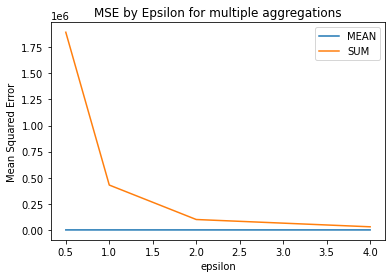

In [17]:
x1 = epsilon_list
y1 = mse[wn.dp_mean]
y2 = mse[wn.dp_sum]
plt.plot(x1, y1, label = "MEAN")
plt.plot(x1, y2, label = "SUM")
plt.xlabel('epsilon')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Epsilon for multiple aggregations')
plt.legend()
plt.show()

#### Mean Signed Deviation by epsilon for MEAN, SUM

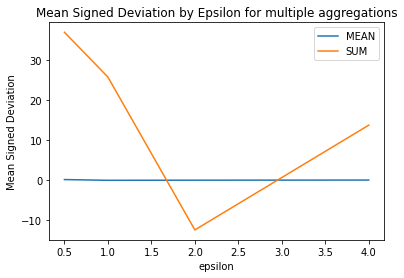

In [18]:
x1 = epsilon_list
y1 = msd[wn.dp_mean]
y2 = msd[wn.dp_sum]
plt.plot(x1, y1, label = "MEAN")
plt.plot(x1, y2, label = "SUM")
plt.xlabel('epsilon')
plt.ylabel('Mean Signed Deviation')
plt.title('Mean Signed Deviation by Epsilon for multiple aggregations')
plt.legend()
plt.show()